# Normal distribution for Isotropic errors


The analysis of isotropic errors in this repository deals with deals with a special set of isotropic error called the normal error distribution which has the following density function:

$$
f_n(\sigma,\theta_0)=\frac{(2d-2)!!}{(2\pi)^d}\frac{(1-\sigma^2)}{(1+\sigma^2-2\sigma\cos(\theta_0))^d} 
$$

We visualise this distribution here for dimension 2 to get a better understanding of its behaviour. The corresponding density $f$ and distribution $F$ functions are given by the expressions below:

$$
f(\sigma, \theta_0) = \frac{1}{2\pi^2}\frac{1-\sigma^2}{(1+\sigma^2-2\sigma\cos\theta_0)^2}
$$

$$
F(\sigma, \theta_0) = \frac{1+\sigma^2}{\pi \sigma^2}\arctan{\left(\frac{\sigma\sin\theta_0}{1-\sigma\cos\theta_0}\right)} + \frac{(1+\sigma^2)\sigma\theta_0 - (1-\sigma^2)\sin\theta_0 - 2\sigma^2\theta_0\cos\theta_0}{\pi \sigma(1+\sigma^2 -2\sigma\cos\theta_0)}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(sigma: float, theta0: float) -> float:
    num = 1 - sigma**2
    denom = (1 + sigma**2 - (2 * sigma * np.cos(theta0))) ** 2
    return (num / denom) / (2 * (np.pi) ** 2)

In [3]:
def F(sigma: float, theta0: float) -> float:
    term1 = ((1 + sigma**2) / (np.pi * sigma**2)) * np.arctan(
        (sigma * np.sin(theta0)) / (1 - sigma * np.cos(theta0))
    )
    term2 = (
        (1 + sigma**2) * sigma * theta0
        - (1 - sigma**2) * np.sin(theta0)
        - (2 * (sigma**2) * theta0 * (np.cos(theta0)))
    ) / (np.pi * sigma * (1 + sigma**2 - 2 * sigma * np.cos(theta0)))

    return term1 + term2

In [4]:
theta0 = np.linspace(0, np.pi, 100)
sigmas = [0.5, 0.6, 0.7, 0.8]

In [5]:
f = {sigmas[i]: f(sigmas[i], theta0) for i in range(len(sigmas))}

In [6]:
F = {sigmas[i]: F(sigmas[i], theta0) for i in range(len(sigmas))}

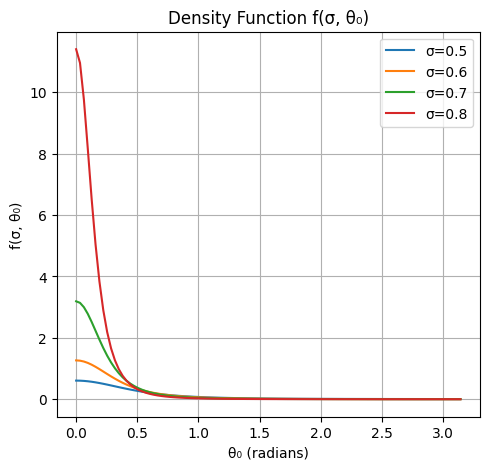

In [7]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for sigma in sigmas:
    plt.plot(theta0, f[sigma], label=f"σ={sigma}")
plt.title("Density Function f(σ, θ₀)")
plt.xlabel("θ₀ (radians)")
plt.ylabel("f(σ, θ₀)")
plt.legend()
plt.grid()
plt.show()

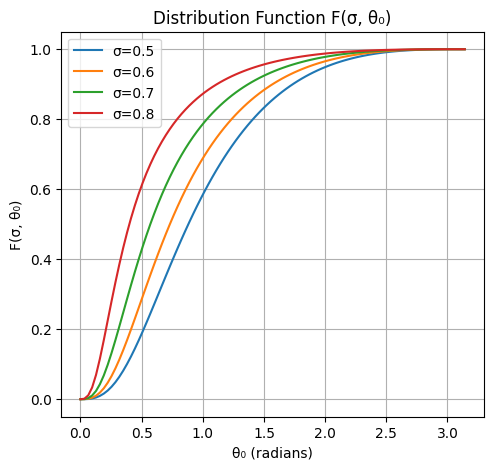

In [8]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
for sigma in sigmas:
    plt.plot(theta0, F[sigma], label=f"σ={sigma}")
plt.title("Distribution Function F(σ, θ₀)")
plt.xlabel("θ₀ (radians)")
plt.ylabel("F(σ, θ₀)")
plt.legend()
plt.grid()
plt.show()